In [1]:
#!pip install html-table-parser-python3
import re
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#- Need Graphs for margins and ratios - Use other excel to complete
# See if you can get the quarterly revenues? 
#response = requests.get("https://www.macrotrends.net/stocks/charts/KO/cocacola/revenue")
#response1 = response.json()
#response1  #######API calls are not working because you don't have the API URL

In [6]:
#universalurl = 'https://www.macrotrends.net/stocks/charts/'
#exampleurl = "https://www.macrotrends.net/stocks/charts/KO/cocacola/financial-statements"
companies = ['KO/cocacola/', 'PAYX/paychex/']
incomeurls = []
for company in companies:
        link = 'https://www.macrotrends.net/stocks/charts/' + company
        incomeurls.append(link)
print(incomeurls)
years = []

revenue = []
grossprofit = []
netincome = []
shequity = []
ltdebt = []
totaldebt = []
totalassets = []
cash = []
retainedearnings = []
capitalexp = []
grossmargin = []
netmargin = []
roe = []
cashoverltdebt = []
expovernet = []

EPS = []
PERatio = []

def scraperrev(financialurl):
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    revenues = companies.find_all('tr')[1:14]
    for textrevenue in revenues:
        nvrevenue = textrevenue.get_text()
        listrevenue = nvrevenue.split()
        year = int(listrevenue[0])
        years.append(year)
        listrevenue = int(listrevenue[1].replace('$','').replace(',',''))
        revenue.append(listrevenue)
def scrapergp(financialurl):
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    grossprofits = companies.find_all('tr')[1:14]
    for textgp in grossprofits:
        newtextgp = textgp.get_text()
        listsofgp = newtextgp.split()
        listsofgp = int(listsofgp[1].replace('$','').replace(',',''))
        grossprofit.append(listsofgp)           
def scraperni(financialurl):
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    netincomes = companies.find_all('tr')[1:14]
    for textni in netincomes:
        newtextni = textni.get_text()
        listsofni = newtextni.split()
        listsofni = int(listsofni[1].replace('$','').replace(',',''))
        netincome.append(listsofni)
######Problem with str object has no attribute get text
#def scrapershequity(financialurl):
    #company = requests.get(financialurl)
    #companies = BeautifulSoup(company.content, "html.parser")
    #shequity = companies.find_all('tr')[1:14]
    #for textsheq in shequity:
        #newtextsheq = textsheq.get_text()
        #listsofsheq = newtextsheq.split()
        #listsofsheq = listsofsheq[1]
        #shequity.append(listsofsheq)
######
def scraperltdebt(financialurl):
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    ltdebts = companies.find_all('tr')[1:14]
    for textltdebt in ltdebts:
        newtextltdebt = textltdebt.get_text()
        listsofltdebt = newtextltdebt.split()
        try:
            listsofltdebt = listsofltdebt[1].replace('$','').replace(',','')
        except:
            listsofltdebt = 0
        ltdebt.append(listsofltdebt)
def scraperliabilities(financialurl):  
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    tdebts = companies.find_all('tr')[1:14]
    for texttdebt in tdebts:
        newtexttdebt = texttdebt.get_text()
        listsoftdebt = newtexttdebt.split()
        listsoftdebt = int(listsoftdebt[1].replace('$','').replace(',',''))
        totaldebt.append(listsoftdebt)         
def scraperassets(financialurl):  
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    assets = companies.find_all('tr')[1:14]
    for textassets in assets:
        newtextassets = textassets.get_text()
        listsofassets = newtextassets.split()
        listsofassets = int(listsofassets[1].replace('$','').replace(',','')) 
        totalassets.append(listsofassets)
def scrapercash(financialurl):  
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    cashes = companies.find_all('tr')[1:14]
    for textcash in cashes:
        newtextcash = textcash.get_text()
        listsofcash = newtextcash.split()
        listsofcash = int(listsofcash[1].replace('$','').replace(',',''))
        cash.append(listsofcash)      
def scraperretainedearnings(financialurl):  
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    RE = companies.find_all('tr')[1:14]
    for textre in RE:
        newtextre = textre.get_text()
        listsofre = newtextre.split()
        listsofre = int(listsofre[1].replace('$','').replace(',', ''))
        retainedearnings.append(listsofre)    
def scrapercapexp(financialurl):  
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    capexp = companies.find_all('tr')[1:14]
    for textcapexp in capexp:
        newtextcapexp = textcapexp.get_text()
        listsofcapexp = newtextcapexp.split()
        listsofcapexp = int(listsofcapexp[1].replace('$','').replace(',',''))
        capitalexp.append(listsofcapexp)
def listreset():
        years.clear()
        revenue.clear()
        grossprofit.clear()
        netincome.clear()
        ltdebt.clear()
        totaldebt.clear()
        totalassets.clear()
        cash.clear()
        retainedearnings.clear()
        capitalexp.clear() 

        
grossmargin = []
netmargin = []
roe = []
cashoverltdebt = []
expovernet = []

#EPS = []
#PERatio = []

def universalscrapeandcsv(modifiedlinks):
    for modifiedlink in modifiedlinks: #Because the items are in a list. #Also, these are all put into the same csv. 
        #listreset()
        scraperrev(modifiedlink + "revenue")
        scrapergp(modifiedlink + "gross-profit")
        scraperni(modifiedlink + "net-income")
        scraperltdebt(modifiedlink + "long-term-debt")
        scraperliabilities(modifiedlink + "total-liabilities")
        scraperassets(modifiedlink + "total-assets")
        scrapercash(modifiedlink + "cash-on-hand")
        scraperretainedearnings(modifiedlink + "retained-earnings-accumulated-deficit")
        scrapercapexp(modifiedlink + "net-change-in-property-plant-equipment")
        data_dict = {'Years': years, 'Revenue (mil)': revenue, 'G. Profit (mil)': grossprofit, 'N. Income (mil)': netincome, 
                     'LT Debt (mil)': ltdebt, 'T. Debt (mil)': totaldebt, 'Assets (mil)': totalassets, 'Cash (mil)': cash, 
                     'Ret. Earn. (mil)': retainedearnings, 'Cap. Exp. (mil)': capitalexp}
        moddedstring = modifiedlink.replace('https://www.macrotrends.net/stocks/charts/','').replace('/', '')
        Tags = pd.DataFrame(data_dict)
        Tags['Gross Margin'] = (Tags['G. Profit (mil)']/Tags['Revenue (mil)'])
        Tags['Net Margin'] = (Tags['N. Income (mil)']/Tags['Revenue (mil)'])
        ##Tags['ROE'] = (Tags['N. Income (mil)']/Tags['Revenue (mil)']) NOT possible because I can't get SH Equity
        #Tags['Cash-LT Debt'] = (Tags['Cash (mil)']/Tags['LT Debt (mil)']) Don't know why it doesn't work. 
        Tags['Exp-Net Inc.'] = -(Tags['Cap. Exp. (mil)']/Tags['N. Income (mil)'])
        Tags.to_csv(f'Company-{moddedstring}.csv', encoding='utf-8', index=False)
        print(Tags)
#scraperrev("https://www.macrotrends.net/stocks/charts/KO/cocacola/revenue")
#scrapergp("https://www.macrotrends.net/stocks/charts/KO/cocacola/gross-profit")
#scraperni("https://www.macrotrends.net/stocks/charts/KO/cocacola/net-income")
##scrapershequity("https://www.macrotrends.net/stocks/charts/KO/cocacola/total-share-holder-equity")
#scraperltdebt("https://www.macrotrends.net/stocks/charts/KO/cocacola/long-term-debt")
#scraperliabilities("https://www.macrotrends.net/stocks/charts/KO/cocacola/total-liabilities")
#scraperassets("https://www.macrotrends.net/stocks/charts/KO/cocacola/total-assets")
#scrapercash("https://www.macrotrends.net/stocks/charts/KO/cocacola/cash-on-hand")
#scraperretainedearnings("https://www.macrotrends.net/stocks/charts/KO/cocacola/retained-earnings-accumulated-deficit")
#scrapercapexp("https://www.macrotrends.net/stocks/charts/KO/cocacola/net-change-in-property-plant-equipment")

#'SH Equity': shequity


universalscrapeandcsv(incomeurls)


def arraycheck():
    print(len(revenue))
    print(len(grossprofit))
    print(len(netincome))
    #print(len(shequity))
    print(len(ltdebt))
    print(len(totaldebt))
    print(len(totalassets))
    print(len(cash))
    print(len(retainedearnings))
    print(len(capitalexp)) #
    print(len(grossmargin))
    print(len(netmargin))
    print(len(roe))
    print(len(cashoverltdebt))
    
arraycheck()

['https://www.macrotrends.net/stocks/charts/KO/cocacola/', 'https://www.macrotrends.net/stocks/charts/PAYX/paychex/']


ValueError: All arrays must be of the same length

<AxesSubplot:xlabel='Years'>

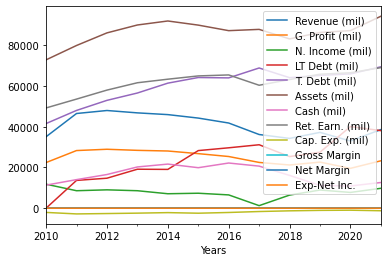

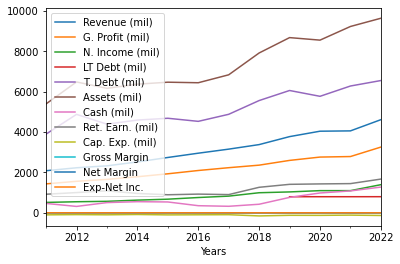

In [78]:
Cocacola = pd.read_csv('Company-KOcocacola.csv', index_col=0, parse_dates=True) #Index Col and Parse Dates sets up the graph. 
Paychex = pd.read_csv('Company-PAYXpaychex.csv', index_col=0, parse_dates=True) 
Cocacola.plot()
Paychex.plot()
#If you put the Tags.to_csv(f'Company-{moddedstring}', encoding='utf-8', index=False) before the added columns your plots
# won't contain the margins. 

<AxesSubplot:xlabel='Years'>

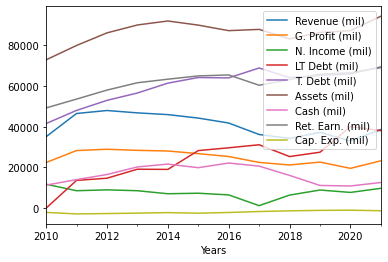

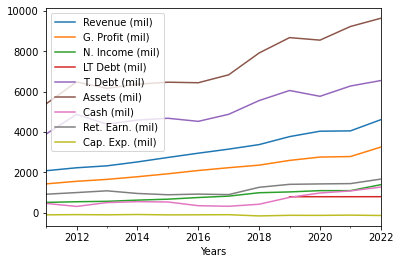

In [29]:
# Important List information
mylist1 = [1,2,3,4,5,6]
mylist2 = ['a', 'b', 'c']
mylist3 = [100,200,300]
newlist = []
for item in zip(mylist1, mylist2, mylist3):
    print(item)
    newlist.append(item)
print(newlist)


print('\033[1m', list(zip(mylist1,mylist2)), '\033[1m')
for a,b,c in zip(mylist1, mylist2, mylist3): # remember that you can print a certain part of a list. 
    print(b)

(1, 'a', 100)
(2, 'b', 200)
(3, 'c', 300)
[(1, 'a', 100), (2, 'b', 200), (3, 'c', 300)]
 [(1, 'a'), (2, 'b'), (3, 'c')] 
a
b
c


In [30]:
mynewlist = [mylist1, mylist2, newlist]
ddf = pd.DataFrame(np.array(mynewlist))
print(ddf)
print(datetime.now())

                                         0
0                       [1, 2, 3, 4, 5, 6]
1                                [a, b, c]
2  [(1, a, 100), (2, b, 200), (3, c, 300)]
2023-01-03 20:06:30.045267


C:\Users\DPoll\AppData\Local\Temp\ipykernel_10252\1725457896.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ddf = pd.DataFrame(np.array(mynewlist))


In [31]:
#This was the old method.
##### These links do not help at all###### They scrape only available links on 
######################################https://www.macrotrends.net/stocks/charts/KO/cocacola/financial-statements
#data = []
#urls = []
#Current Listing Page Link
#CocaCola = "https://www.macrotrends.net/stocks/charts/KO/cocacola/financial-statements"
#KO = requests.get(CocaCola)
#KOPage = BeautifulSoup(KO.content, "html.parser")
# Look up any URLs in the soup content first. 
#finstates = KOPage.find_all('div', class_="navigation_tabs")
#print(KOPage)

#for URLS in finstates:
    #URL = URLS.find_all('li')
    #for KOURL in URL:
        #KOURLS = KOURL.find('a').attrs['href']
        #print(KOURLS)
        #urls.append(KOURLS)

#for currentpage in urls:
    #print('*Now Scraping:', currentpage)
    #currentpageresp = requests.get(currentpage)
    #currentpagesoup = BeautifulSoup(currentpageresp.content, "html.parser")    
    #table = currentpagesoup.find_all('tr', limit = 5)
    #print(table)
    #for data in table:
        #datatables = data.find_all('td')
        #for figures in datatables:
            #print(figures.get_text())
##### These links do not help at all###### 

In [ ]:
#Another way to make the scraper
def scraperrev(financialurl):
    company = requests.get(financialurl)
    companies = BeautifulSoup(company.content, "html.parser")
    revenues = companies.find_all('tr')[1:8]
    for textrevenue in revenues:
        nvrevenue = textrevenue.get_text()
        listrevenue = nvrevenue.split()
        listrevenue = [e for e in listrevenue if e not in ('2015', '2016', '2017', '2018', '2019', '2020', '2021')]
        #JUST NOTICE THE for e in listrevenue if e not in function and nothing else.         
        #print(listrevenue)
        for revitems in listrevenue:
            revenue.append(revitems)
            #print(revitems)